In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading the dataset
ds = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **Data exploration**

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Total charges are in object instead of float
ds.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [ ]:
#converting string to float
ds.TotalCharges = pd.to_numeric(ds.TotalCharges, errors='coerce')

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#checking for null values
ds.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#dropping rows of missing values
ds1 = ds[ds.TotalCharges.notnull()]
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [ ]:
#Finding number of unique enteries in the column
for i in ds.columns:
  print(i, ":", ds1[i].nunique())

customerID : 7032
gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 72
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 3
OnlineBackup : 3
DeviceProtection : 3
TechSupport : 3
StreamingTV : 3
StreamingMovies : 3
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1584
TotalCharges : 6530
Churn : 2


In [ ]:
## Finding unique values in any column
for i in ds.columns:
  print(i, ":", ds1[i].unique())


customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transf

In [ ]:
ds1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#finding duplicates
ds1['customerID'].duplicated().sum()

0

In [ ]:
#dropping the column
ds1.drop('customerID', axis=1, inplace=True)

In [ ]:
ds1["Churn"].value_counts()


,count
Churn,
No,5163
Yes,1869


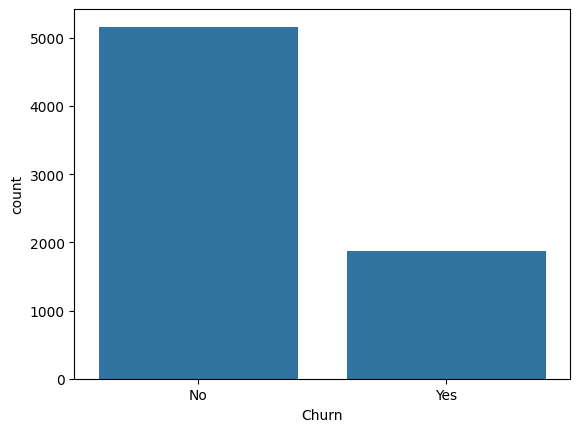

In [ ]:
sns.countplot(data=ds1,x="Churn")
plt.show()

In [ ]:
ds1["gender"].value_counts()

,count
gender,
Male,3549
Female,3483


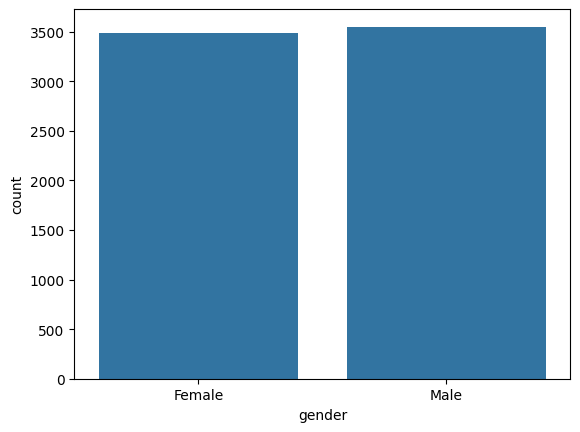

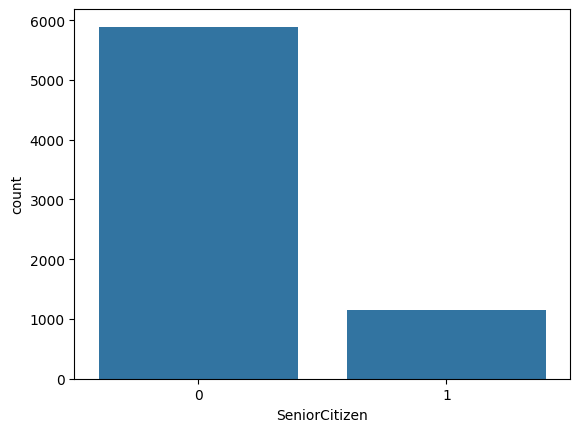

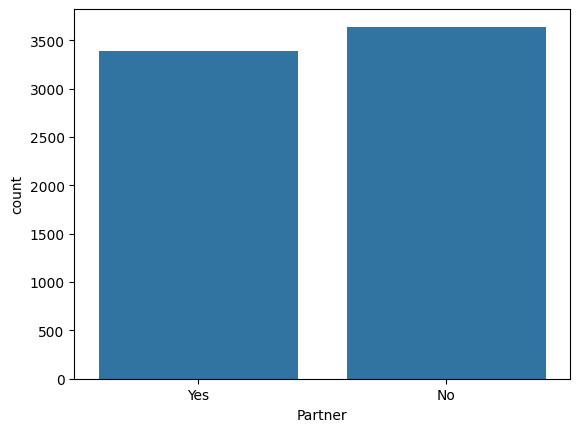

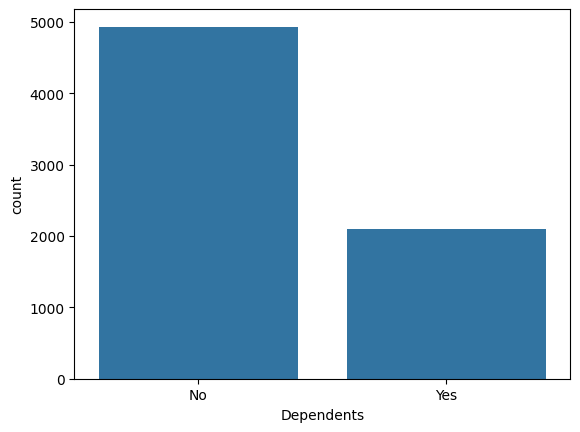

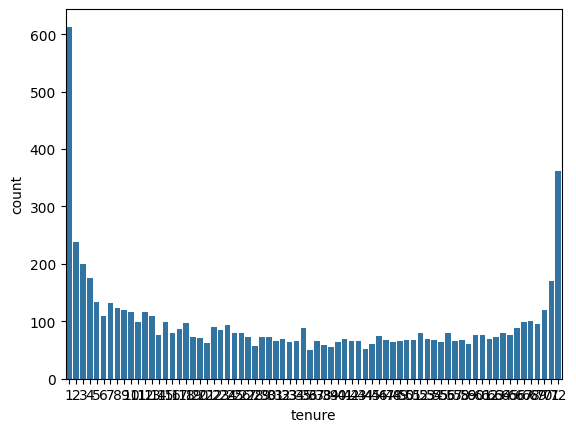

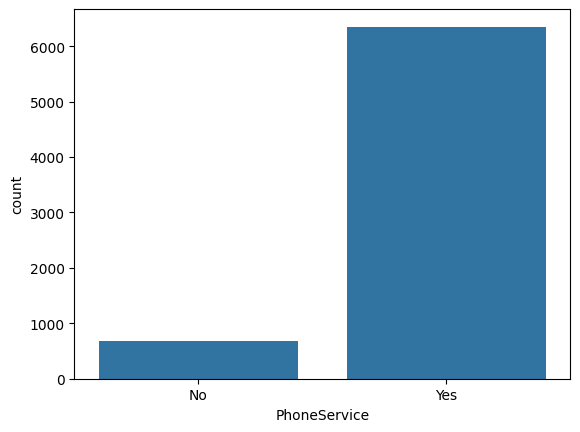

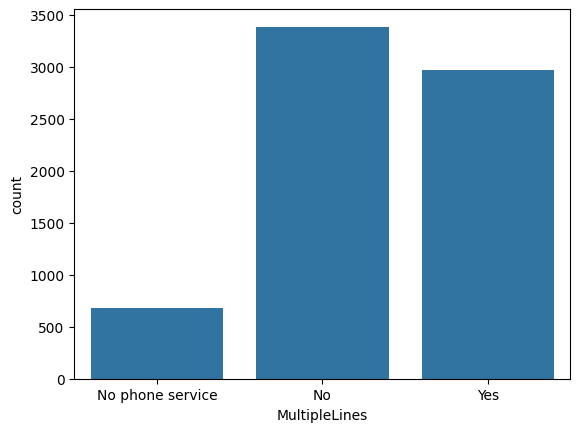

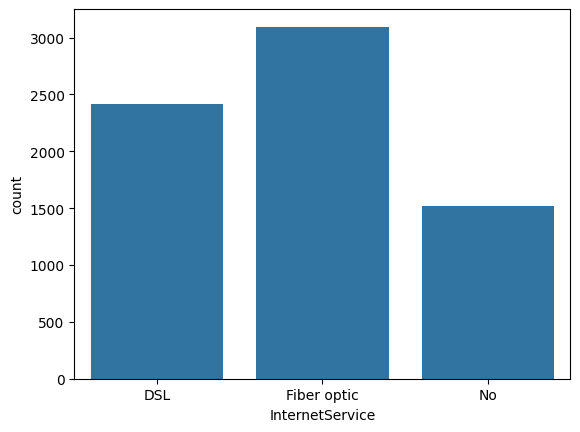

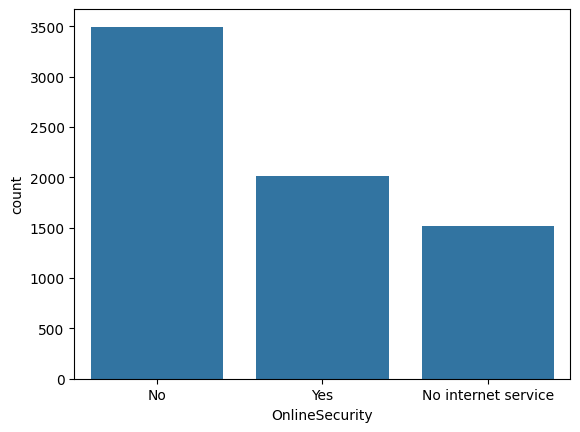

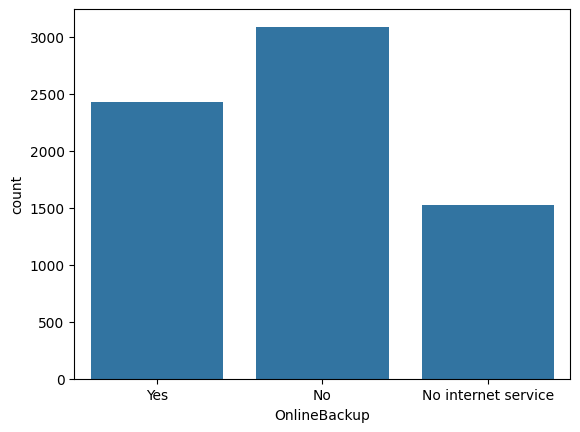

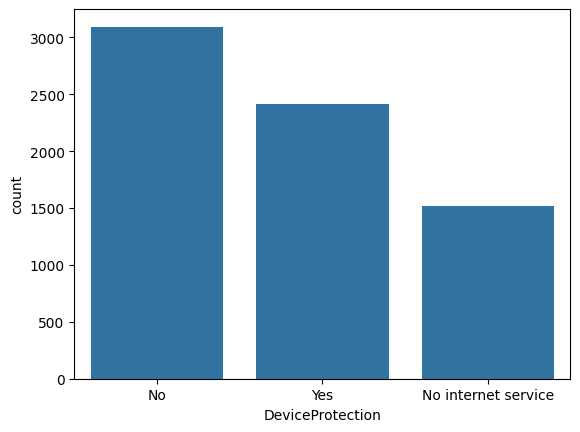

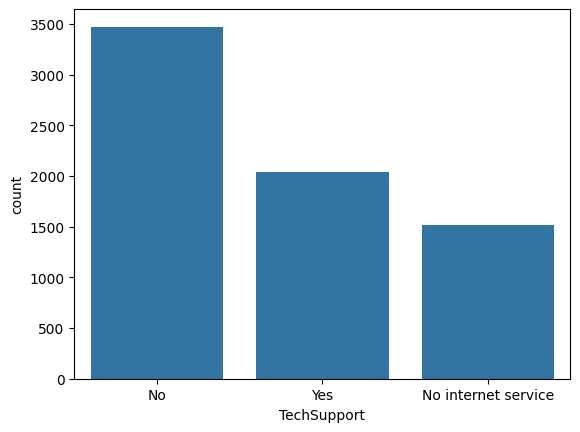

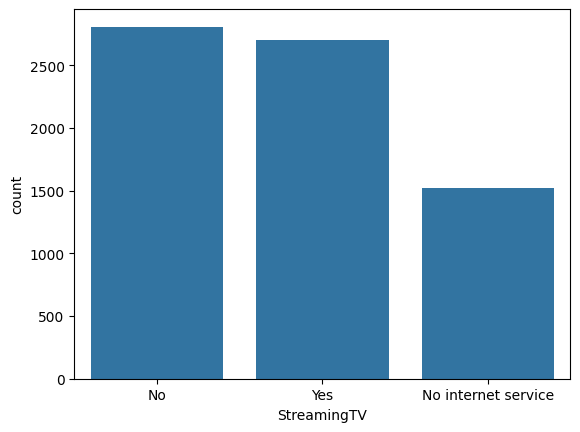

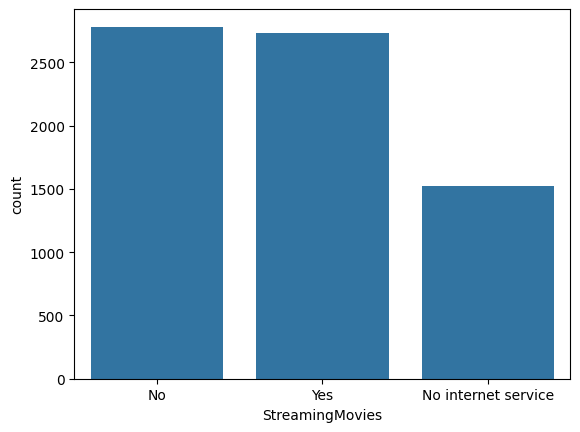

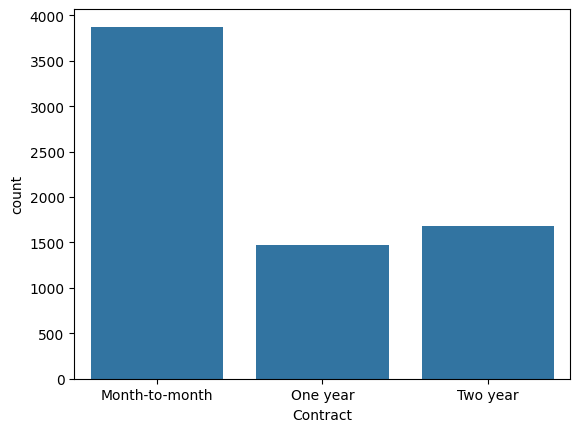

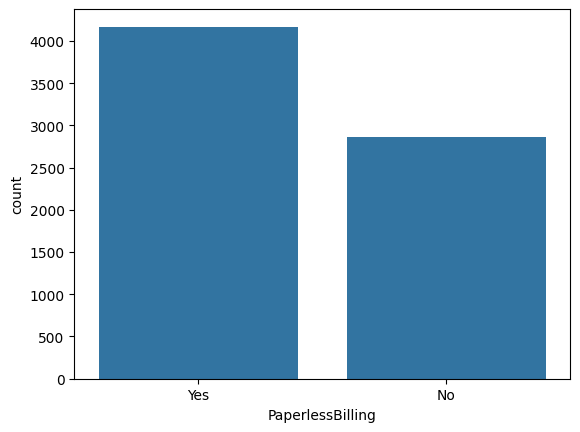

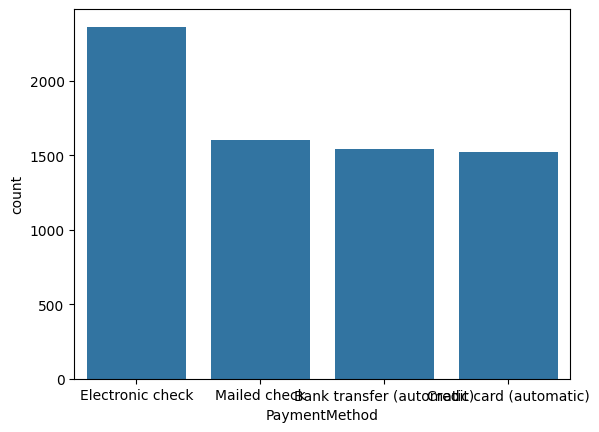

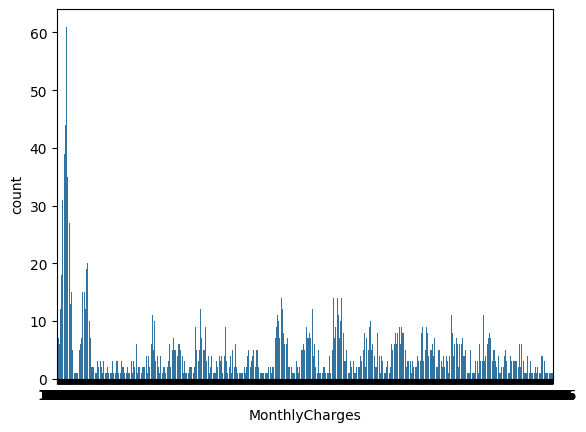

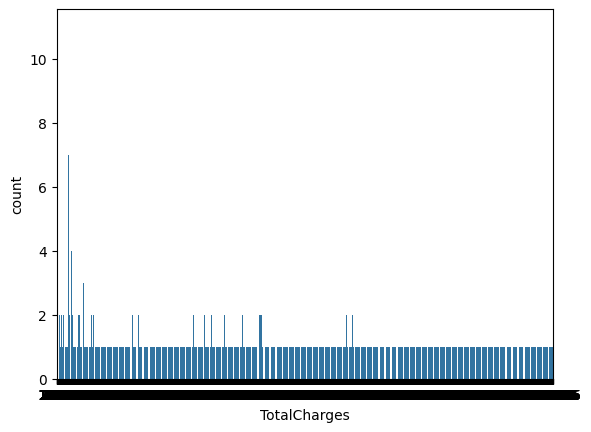

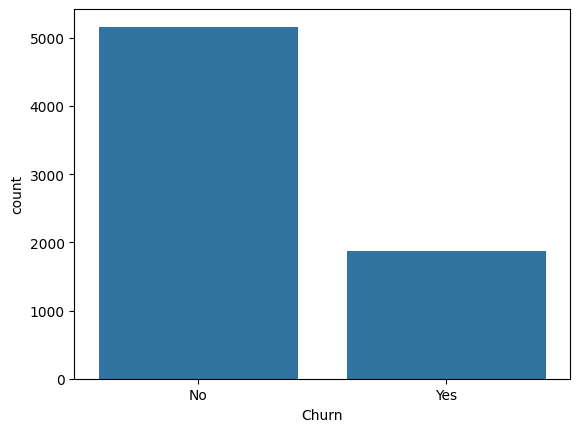

In [ ]:
for i in ds1.columns:
  sns.countplot(data=ds1,x=i)
  plt.show()

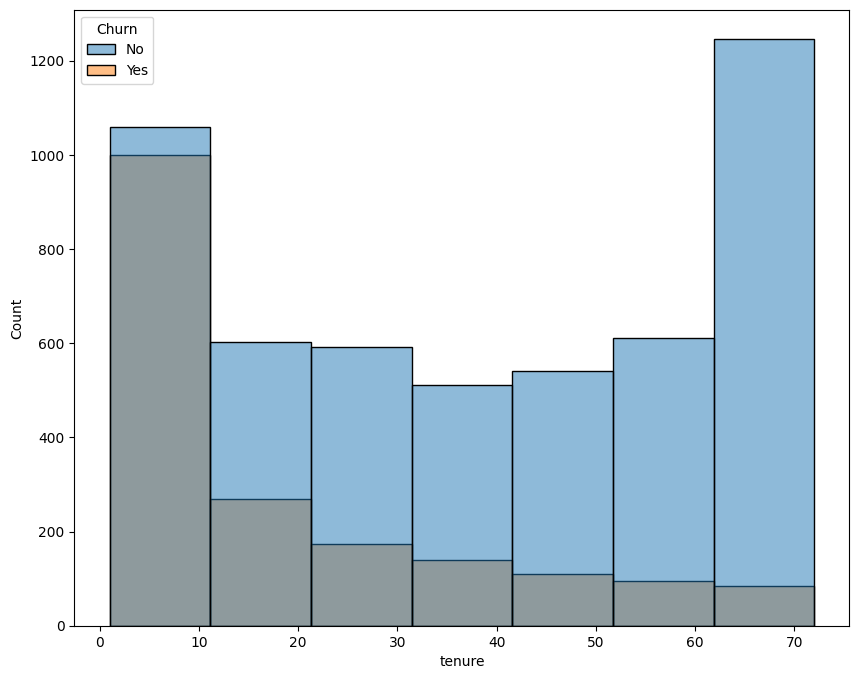

In [ ]:
plt.figure(figsize=(10, 8))
sns.histplot(data=ds1, x="tenure", hue="Churn", binwidth=10)
plt.show()


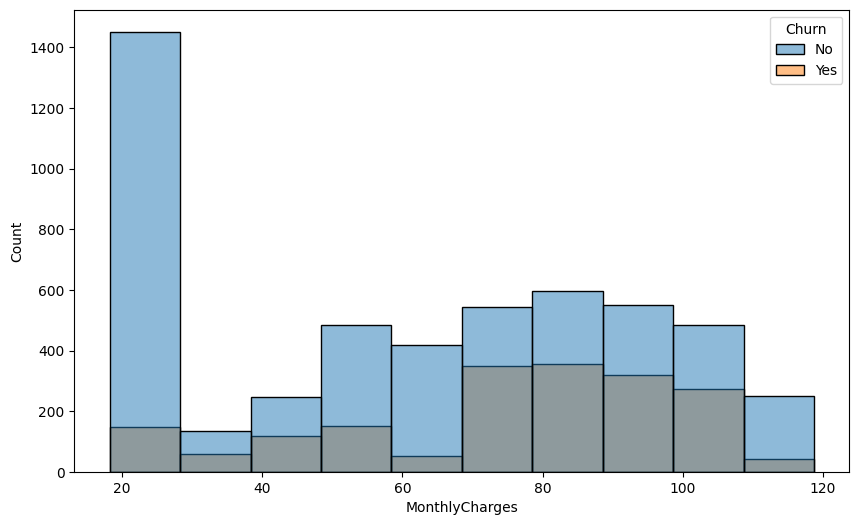

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=ds1, x="MonthlyCharges", hue="Churn", binwidth=10)
plt.show()


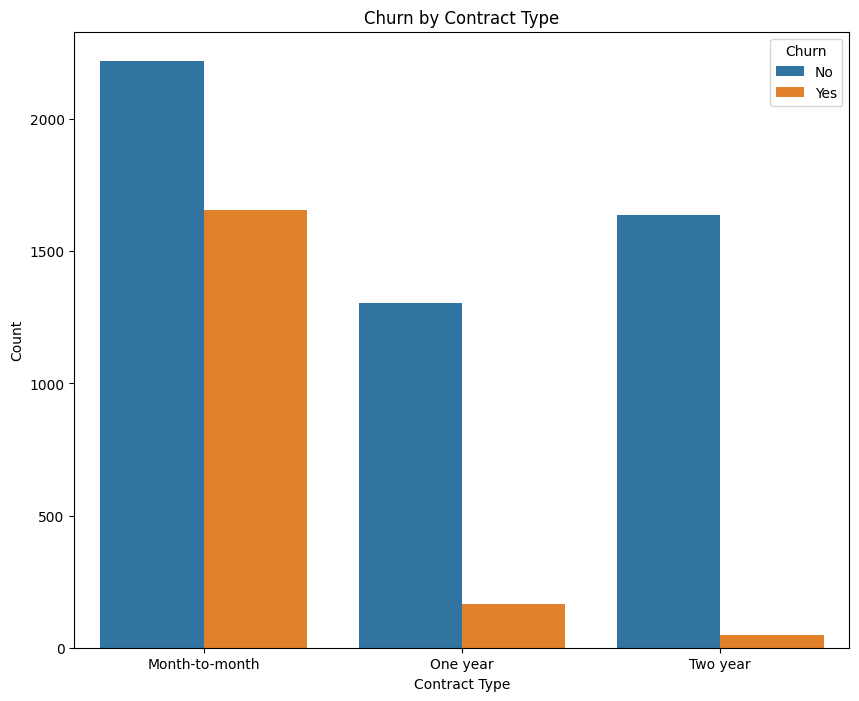

In [ ]:
# Churn count by contract type
plt.figure(figsize=(10, 8))
sns.countplot(x='Contract', hue='Churn', data=ds1)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

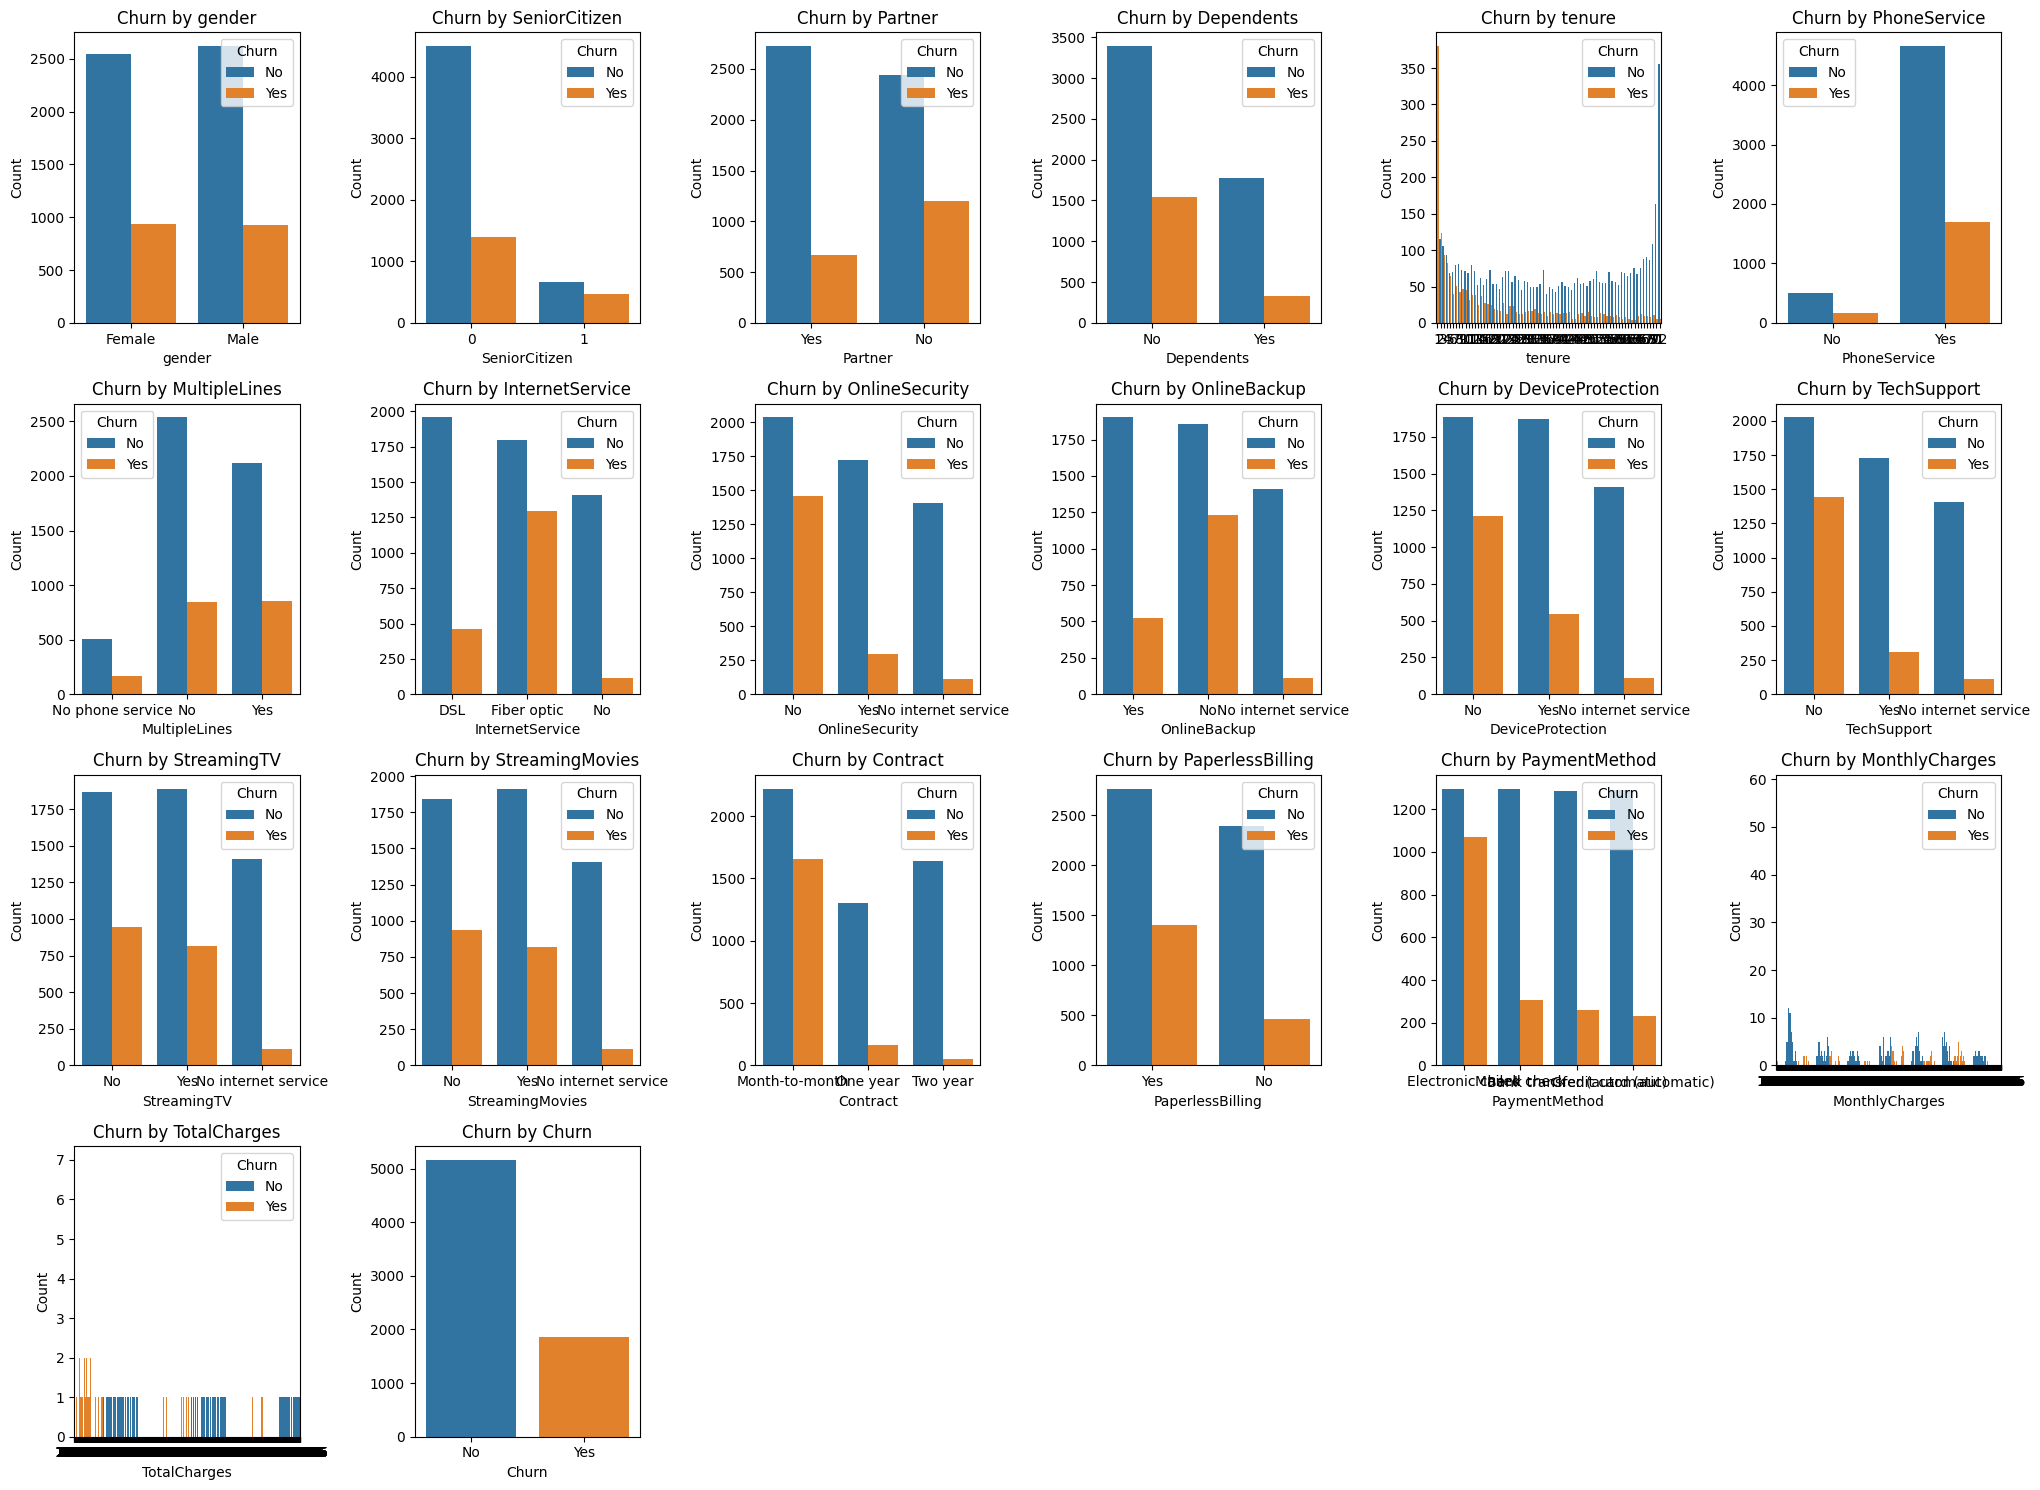

In [ ]:
plt.figure(figsize=(20.5, 15))
for i, service in enumerated (ds1.columns):
    plt.subplot(4, 6, i+1)
    sns.countplot(x=service, hue='Churn', data=ds1)
    plt.title(f'Churn by {service}')
    plt.xlabel(service)
    plt.ylabel('Count')
    plt.tight_layout()
plt.show()

In [ ]:
ds1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
ds1.replace('No internet service','No',inplace=True)
ds1.replace('No phone service','No',inplace=True)

In [ ]:
ds1.replace({'Yes':1,'No':0},inplace=True)

In [ ]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 
 17  

In [ ]:
for i in ds1.columns:
   print(i, ":", ds1[i].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 0]
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [ ]:
ds1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
ds1['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2416
0,1520


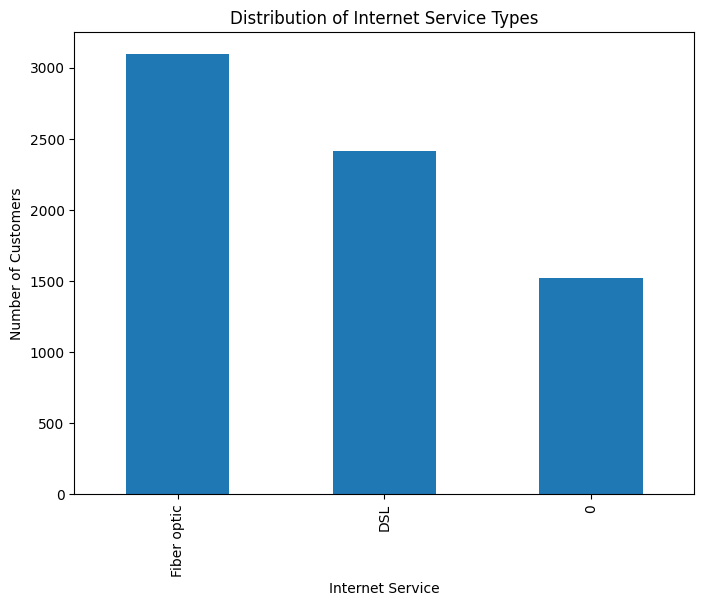

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ds1['InternetService'].value_counts().plot(kind='bar')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()

In [ ]:
ds2 = pd.get_dummies(data= ds1, columns=['InternetService', 'Contract', 'PaymentMethod'])

In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

Outliers for tenure:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, InternetService_0, InternetService_DSL, InternetService_Fiber optic, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 27 columns]


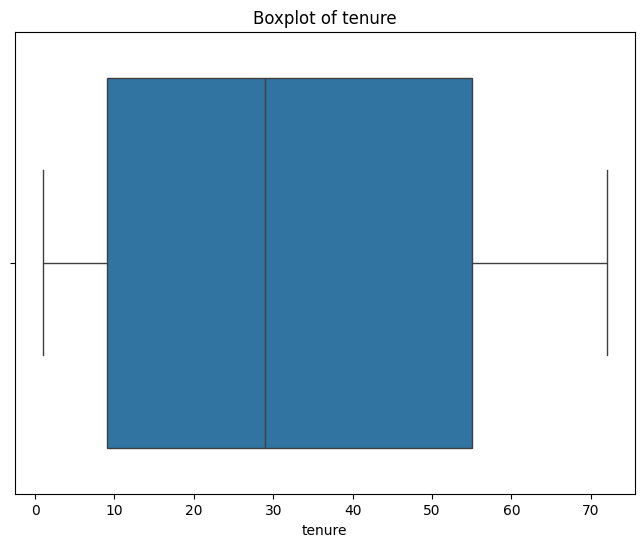

Outliers for MonthlyCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, InternetService_0, InternetService_DSL, InternetService_Fiber optic, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 27 columns]


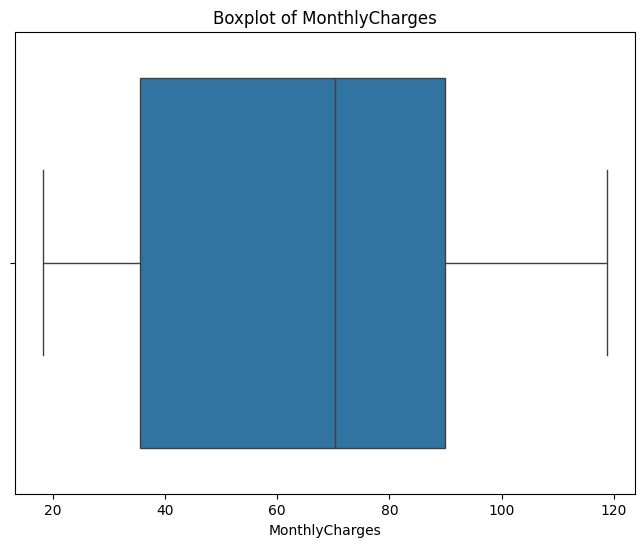

Outliers for TotalCharges:
Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, MonthlyCharges, TotalCharges, Churn, InternetService_0, InternetService_DSL, InternetService_Fiber optic, Contract_Month-to-month, Contract_One year, Contract_Two year, PaymentMethod_Bank transfer (automatic), PaymentMethod_Credit card (automatic), PaymentMethod_Electronic check, PaymentMethod_Mailed check]
Index: []

[0 rows x 27 columns]


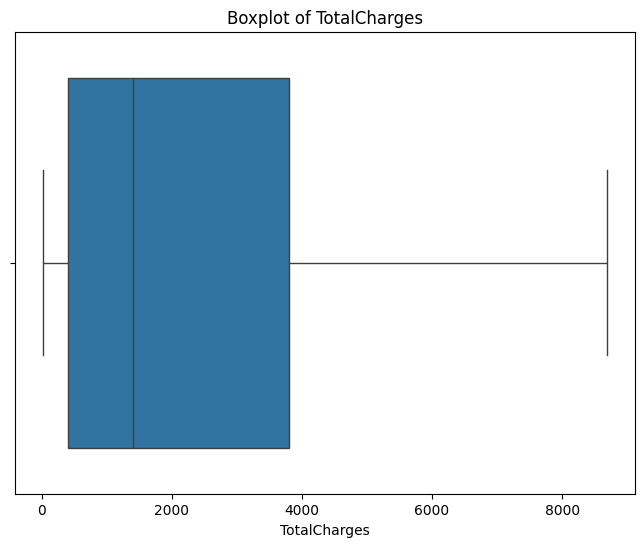

In [ ]:
# Finding outliers using IQR method for numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for feature in numerical_features:
  Q1 = ds2[feature].quan hutile(0.25)
  Q3 = ds2[feature].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = ds2[(ds2[feature] < lower_bound) | (ds2[feature] > upper_bound)]

  print(f"Outliers for {feature}:")
  print(outliers)

  # Plot boxplot to visualize outliers
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=ds2[feature])
  plt.title(f"Boxplot of {feature}")
  plt.show()

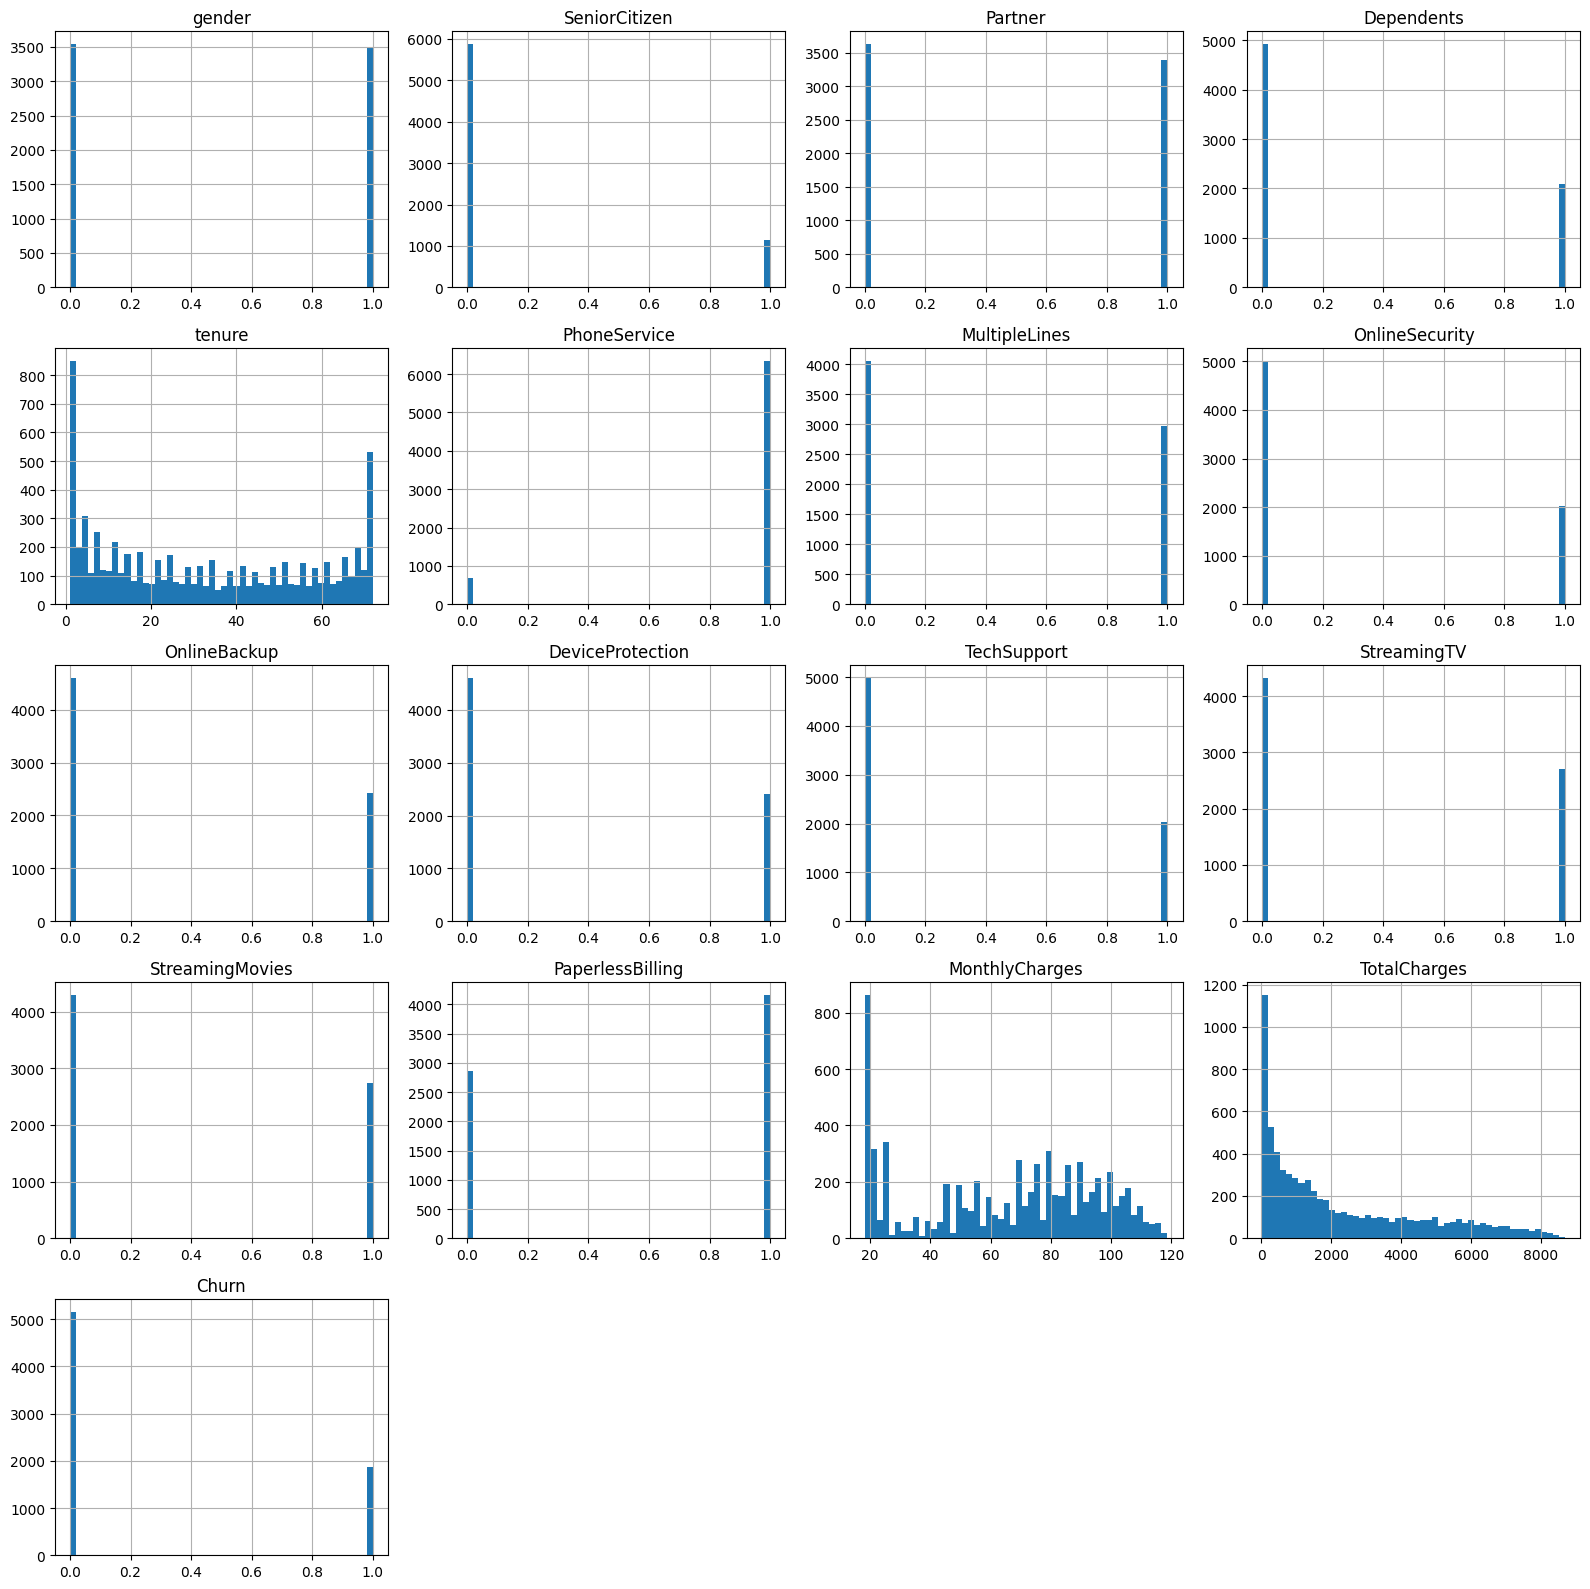

In [ ]:
import matplotlib.pyplot as plt
# Plotting the distribution of the dataset
ds2.hist(figsize=(16, 16), bins=50)
plt.tight_layout()
plt.show()


# Derived features

In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [ ]:
#1. Create tenure groups
ds2['TenureGroup'] = pd.cut(ds1['tenure'], bins=[0, 12, 24, 36, 48, 60, 72],
                            labels=['1 year', '2 years', '3 years', '4 years', '5 years', '6 years'])

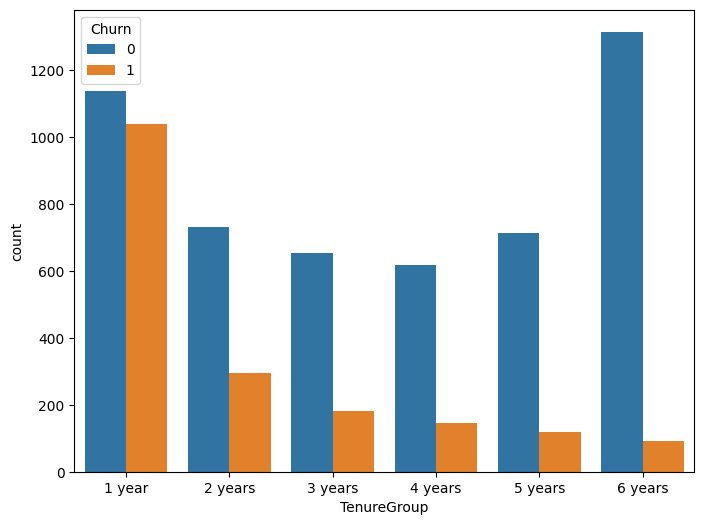

In [ ]:
#plotting the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=ds2, x="TenureGroup", hue= 'Churn')
plt.show()

In [ ]:
ds2['tenure'].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


In [ ]:
ds2['MonthlyCharges'].describe()

,MonthlyCharges
count,7032.000000
mean,64.798208
std,30.085974
min,18.250000
25%,35.587500
50%,70.350000
75%,89.862500
max,118.750000


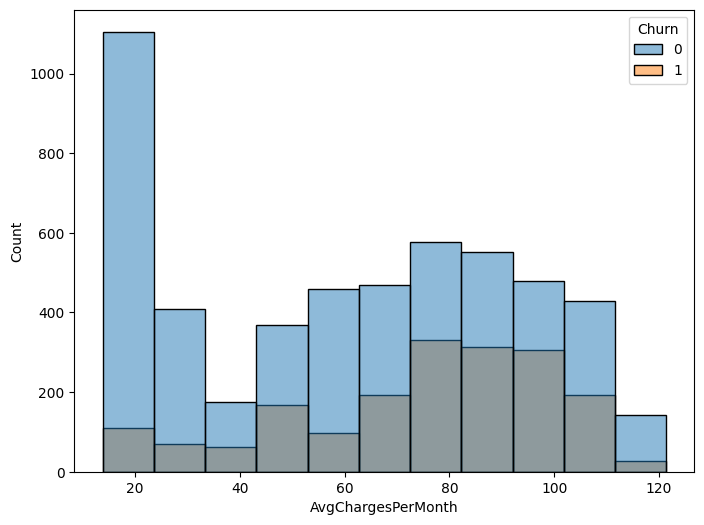

In [ ]:
# 2. AvgChargesPerMonth
ds2['AvgChargesPerMonth'] = ds2['TotalCharges'] / ds2['tenure']

#plot the distribution of this
plt.figure(figsize=(8, 6))
sns.histplot(data=ds2, x="AvgChargesPerMonth", hue="Churn", binwidth=10)
plt.show()

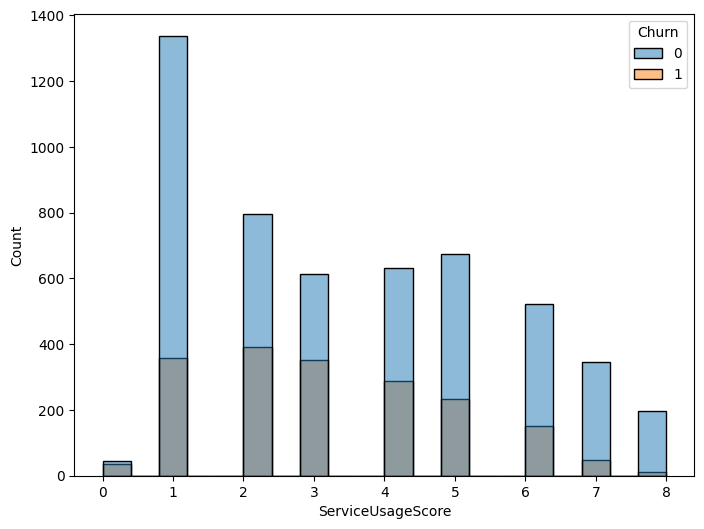

In [ ]:
# 3. Service usage score
service_columns = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
ds2['ServiceUsageScore'] = ds2[service_columns].sum(axis=1)

#plotting the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=ds2, x="ServiceUsageScore", hue= 'Churn')
plt.show()

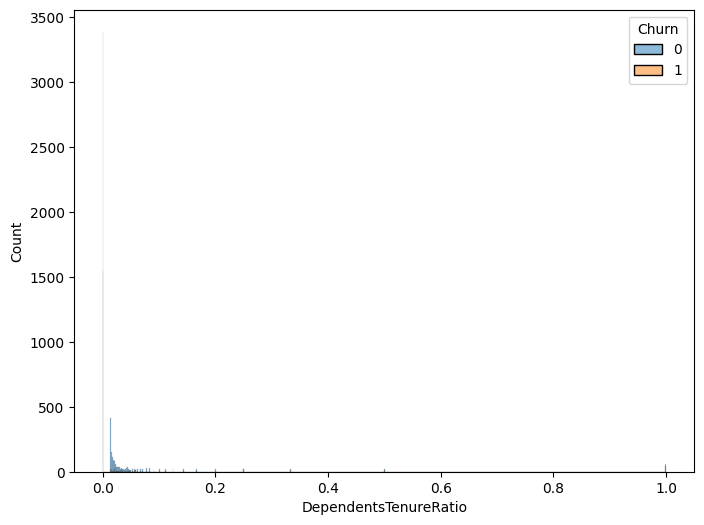

In [ ]:
# 4. Dependents to tenure ratio
ds2['DependentsTenureRatio'] = ds2['Dependents'] / ds2['tenure']

#plotting the distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=ds2, x="DependentsTenureRatio", hue= 'Churn')
plt.show()

In [ ]:
ds2['DependentsTenureRatio'].describe()

,DependentsTenureRatio
count,7032.000000
mean,0.030274
std,0.128593
min,0.000000
25%,0.000000
50%,0.000000
75%,0.014706
max,1.000000


In [ ]:
ds2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup,AvgChargesPerMonth,ServiceUsageScore,DependentsTenureRatio
0,1,0,1,0,1,0,0,0,1,0,...,False,False,False,False,True,False,1 year,29.850000,1,0.0
1,0,0,0,0,34,1,0,1,0,1,...,True,False,False,False,False,True,3 years,55.573529,3,0.0
2,0,0,0,0,2,1,0,1,1,0,...,False,False,False,False,False,True,1 year,54.075000,3,0.0
3,0,0,0,0,45,0,0,1,0,1,...,True,False,True,False,False,False,4 years,40.905556,3,0.0
4,1,0,0,0,2,1,0,0,0,0,...,False,False,False,False,True,False,1 year,75.825000,1,0.0


# Scaling the dataset

In [ ]:
#scaling the columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ds2[['tenure','MonthlyCharges','TotalCharges','AvgChargesPerMonth','ServiceUsageScore']] = scaler.fit_transform(ds2[['tenure','MonthlyCharges','TotalCharges','AvgChargesPerMonth','ServiceUsageScore']])

In [ ]:
ds2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureGroup,AvgChargesPerMonth,ServiceUsageScore,DependentsTenureRatio
0,1,0,1,0,0.000000,0,0,0,1,0,...,False,False,False,False,True,False,1 year,0.149361,0.125,0.0
1,0,0,0,0,0.464789,1,0,1,0,1,...,True,False,False,False,False,True,3 years,0.388372,0.375,0.0
2,0,0,0,0,0.014085,1,0,1,1,0,...,False,False,False,False,False,True,1 year,0.374448,0.375,0.0
3,0,0,0,0,0.619718,0,0,1,0,1,...,True,False,True,False,False,False,4 years,0.252084,0.375,0.0
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,False,False,False,True,False,1 year,0.576539,0.125,0.0


In [ ]:
ds2 = pd.get_dummies(data= ds2, columns=['TenureGroup'])

In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

# Correlation

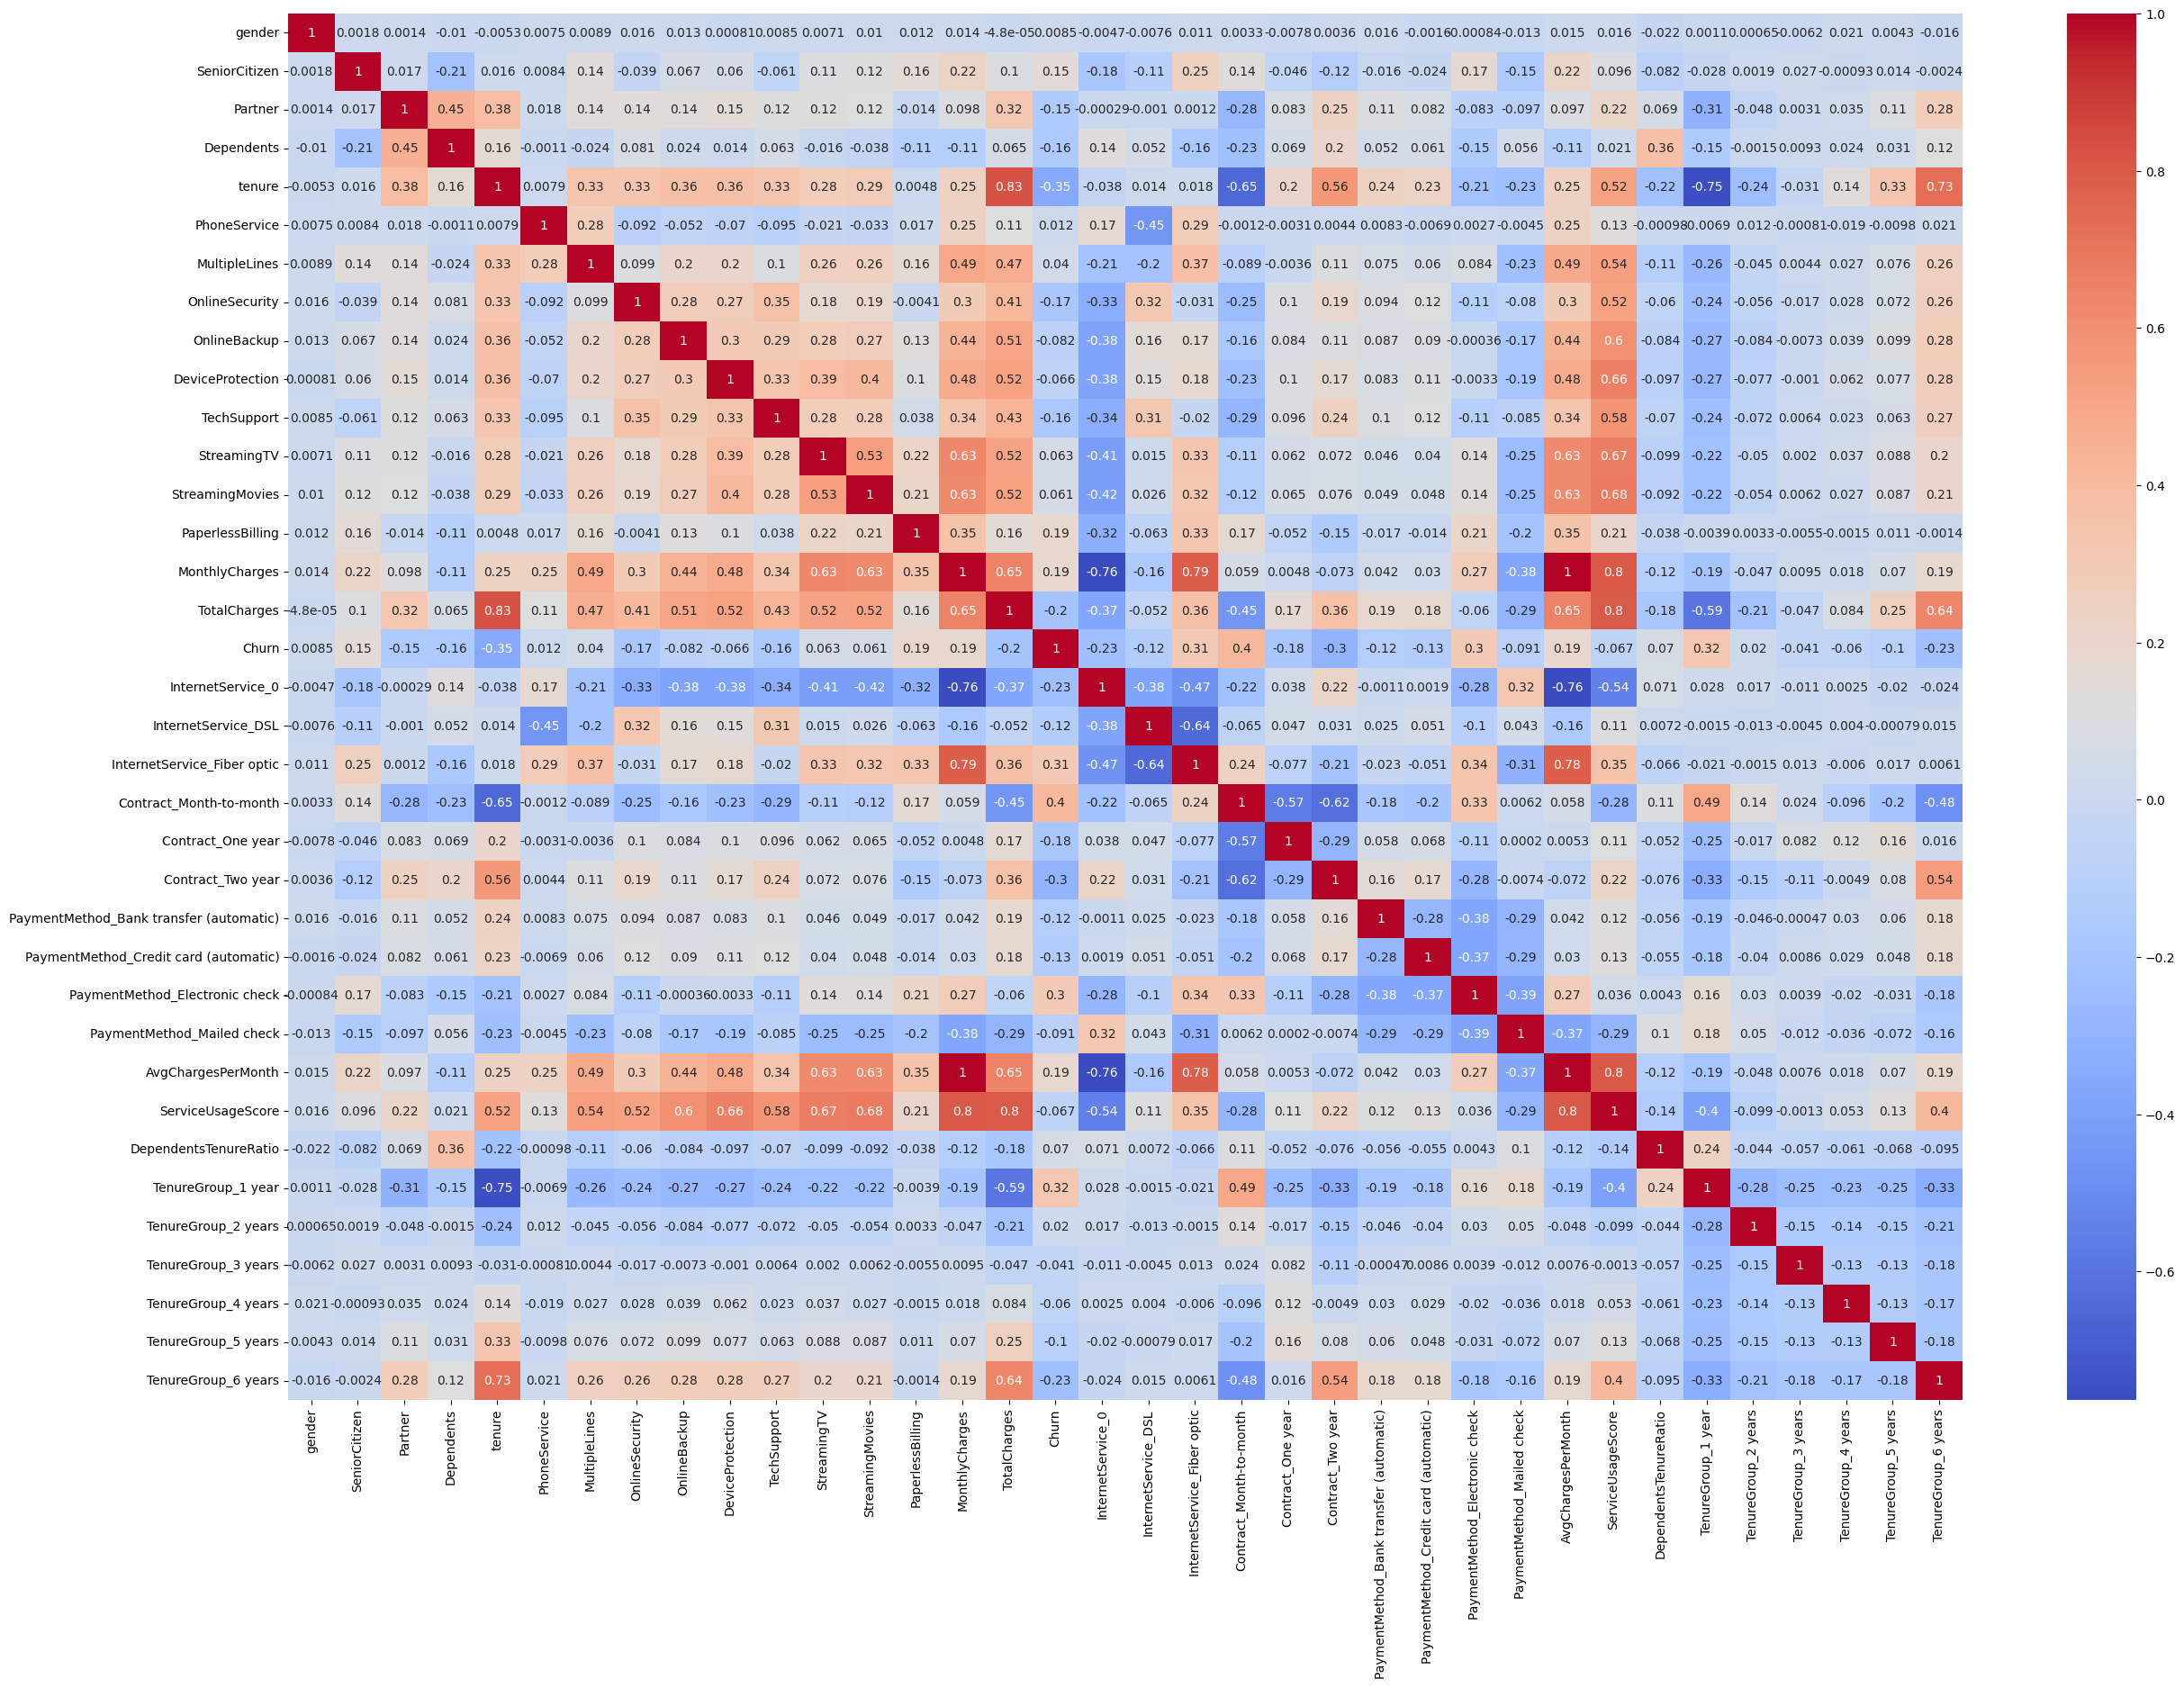

In [ ]:
#plotting correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(ds2.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# correlation matrix in ascending order
ds2.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
Contract_Month-to-month,0.404565
TenureGroup_1 year,0.319628
InternetService_Fiber optic,0.307463
PaymentMethod_Electronic check,0.301455
MonthlyCharges,0.192858
AvgChargesPerMonth,0.192033
PaperlessBilling,0.191454
SeniorCitizen,0.150541
DependentsTenureRatio,0.069594


In [ ]:
ds2 = ds2.drop('gender', axis=1)

In [ ]:
ds2 = ds2.drop('AvgChargesPerMonth', axis=1)

In [ ]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   float64
 4   PhoneService                             7032 non-null   int64  
 5   MultipleLines                            7032 non-null   int64  
 6   OnlineSecurity                           7032 non-null   int64  
 7   OnlineBackup                             7032 non-null   int64  
 8   DeviceProtection                         7032 non-null   int64  
 9   TechSupport                              7032 non-null   int64  
 10  StreamingTV                              7032 non-nul

# Splitting the dataset

In [ ]:
#splitting the dataset
X = ds2.drop('Churn', axis=1)
y = ds2['Churn']

In [ ]:
# feature selection by Lasso method

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Create a Lasso model with a suitable alpha value
lasso = Lasso(alpha=0.01)

# Fit the Lasso model to your data
lasso.fit(X, y)

# Use SelectFromModel to identify features with non-zero coefficients
model = SelectFromModel(lasso, prefit=True)
X_new = model.transform(X)

# Get the selected feature names
selected_features = X.columns[model.get_support()]

print("Selected Features:")
print(selected_features)



Selected Features:
Index(['tenure', 'OnlineSecurity', 'TechSupport', 'PaperlessBilling',
       'InternetService_0', 'InternetService_Fiber optic',
       'Contract_Month-to-month', 'PaymentMethod_Electronic check',
       'TenureGroup_1 year'],
      dtype='object')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Decision Tree

In [ ]:
model = DecisionTreeClassifier(random_state=42)

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7377398720682303
Precision: 0.512
Recall: 0.5079365079365079
F1 Score: 0.5099601593625498


In [ ]:
## Checking our baseline accuracy
y.value_counts(normalize=True)

,proportion
Churn,
0,0.734215
1,0.265785


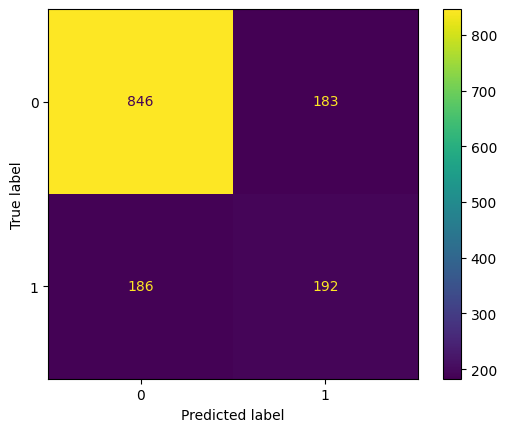

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

## displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

In [ ]:
## changing depth of the model
metrics = {}
for depth in range(3, 8):
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate quality metrics
    metrics[depth] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Print the metrics for each depth
for depth, metric in metrics.items():
    print(f"Depth {depth}: {metric}")


Depth 3: {'Accuracy': 0.7803837953091685, 'Precision': 0.7105263157894737, 'Recall': 0.34704370179948585, 'F1 Score': 0.46632124352331605}
Depth 4: {'Accuracy': 0.7825159914712153, 'Precision': 0.6416382252559727, 'Recall': 0.4832904884318766, 'F1 Score': 0.5513196480938416}
Depth 5: {'Accuracy': 0.7818052594171997, 'Precision': 0.6990291262135923, 'Recall': 0.37017994858611825, 'F1 Score': 0.48403361344537815}
Depth 6: {'Accuracy': 0.7924662402274343, 'Precision': 0.6381766381766382, 'Recall': 0.5758354755784062, 'F1 Score': 0.6054054054054054}
Depth 7: {'Accuracy': 0.7924662402274343, 'Precision': 0.6622073578595318, 'Recall': 0.5089974293059126, 'F1 Score': 0.5755813953488372}


In [ ]:
metrics = {}
for depth in range(2, 15):
    model = DecisionTreeClassifier(max_depth=depth, criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate quality metrics
    metrics[depth] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Print the metrics for each depth
for depth, metric in metrics.items():
    print(f"Depth {depth}: {metric}")

Depth 2: {'Accuracy': 0.7540867093105899, 'Precision': 0.5508274231678487, 'Recall': 0.5989717223650386, 'F1 Score': 0.5738916256157636}
Depth 3: {'Accuracy': 0.7803837953091685, 'Precision': 0.7105263157894737, 'Recall': 0.34704370179948585, 'F1 Score': 0.46632124352331605}
Depth 4: {'Accuracy': 0.7825159914712153, 'Precision': 0.6416382252559727, 'Recall': 0.4832904884318766, 'F1 Score': 0.5513196480938416}
Depth 5: {'Accuracy': 0.7818052594171997, 'Precision': 0.6990291262135923, 'Recall': 0.37017994858611825, 'F1 Score': 0.48403361344537815}
Depth 6: {'Accuracy': 0.7924662402274343, 'Precision': 0.6381766381766382, 'Recall': 0.5758354755784062, 'F1 Score': 0.6054054054054054}
Depth 7: {'Accuracy': 0.7931769722814499, 'Precision': 0.6644295302013423, 'Recall': 0.5089974293059126, 'F1 Score': 0.5764192139737991}
Depth 8: {'Accuracy': 0.7810945273631841, 'Precision': 0.6269592476489029, 'Recall': 0.5141388174807198, 'F1 Score': 0.5649717514124294}
Depth 9: {'Accuracy': 0.7796730632551

In [ ]:
#final model
model_fin = DecisionTreeClassifier(max_depth=6, criterion='entropy')
model_fin.fit(X_train, y_train)
y_pred_fin = model_fin.predict(X_test)

# Evaluating the model
accuracy_fin = accuracy_score(y_test, y_pred_fin)
precision_fin = precision_score(y_test, y_pred_fin)
recall_fin = recall_score(y_test, y_pred_fin)
f1_fin = f1_score(y_test, y_pred_fin)

print(f"Accuracy: {accuracy_fin}")
print(f"Precision: {precision_fin}")
print(f"Recall: {recall_fin}")
print(f"F1 Score: {f1_fin}")

Accuracy: 0.7917555081734187
Precision: 0.632398753894081
Recall: 0.5370370370370371
F1 Score: 0.5808297567954221


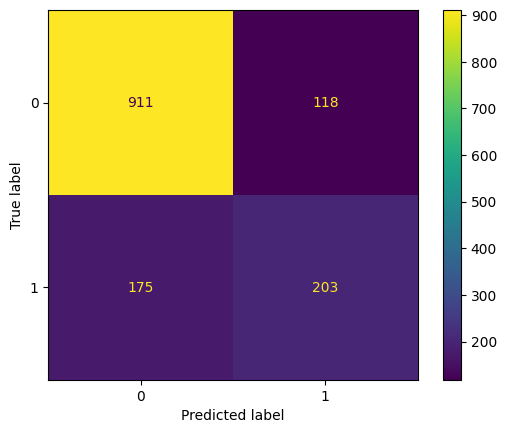

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, y_pred_fin)
## displaying confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot()

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.580605 to fit


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


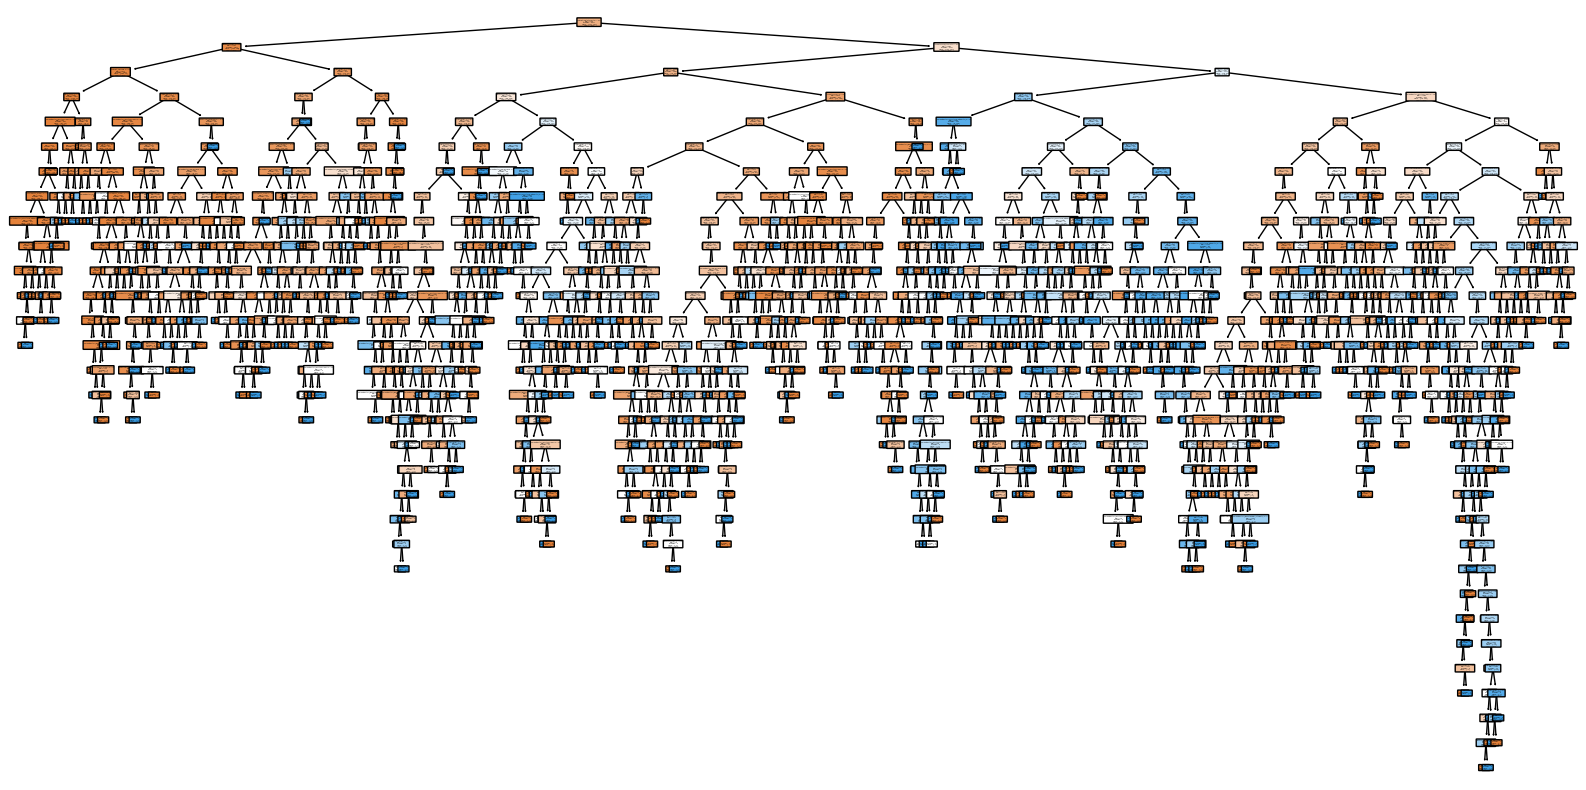

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Export the tree as a dot file
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=['Class0', 'Class1'],
                           filled=True, rounded=True,
                           special_characters=True)

# Render the dot file to a graph
graph = graphviz.Source(dot_data)
graph.render("decision_tree", format="png")  # Save as PNG file
graph.view()

from google.colab import drive
drive.mount('/content/drive')

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model,
          feature_names=X.columns,
          class_names=['Class0', 'Class1'],
          filled=True,
          rounded=True)
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8, p=2, metric='minkowski', weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

def quality_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"Accuracy: {accuracy}")
  print(f"Precision: {precision}")
  print(f"Recall: {recall}")
  print(f"F1 Score: {f1}")

quality_metrics(y_test,y_pred_knn)

Accuracy: 0.7540867093105899
Precision: 0.5533333333333333
Recall: 0.43915343915343913
F1 Score: 0.48967551622418876


In [ ]:
#Setting 1
acc1 = []
for i in range(1,15):
  knn1 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights='distance')
  knn1.fit(X_train, y_train)
  y_pred_knn1 = knn1.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc1.append(accuracy_score(y_test, y_pred_knn1))
  print("Accuracy:", accuracy_score(y_test, y_pred_knn1))

# of neigbours: 1
Accuracy: 0.7327647476901208
# of neigbours: 2
Accuracy: 0.7341862117981521
# of neigbours: 3
Accuracy: 0.7484008528784648
# of neigbours: 4
Accuracy: 0.7469793887704336
# of neigbours: 5
Accuracy: 0.7654584221748401
# of neigbours: 6
Accuracy: 0.7640369580668088
# of neigbours: 7
Accuracy: 0.7654584221748401
# of neigbours: 8
Accuracy: 0.7590618336886994
# of neigbours: 9
Accuracy: 0.7668798862828714
# of neigbours: 10
Accuracy: 0.7661691542288557
# of neigbours: 11
Accuracy: 0.7619047619047619
# of neigbours: 12
Accuracy: 0.7647476901208244
# of neigbours: 13
Accuracy: 0.767590618336887
# of neigbours: 14
Accuracy: 0.7619047619047619


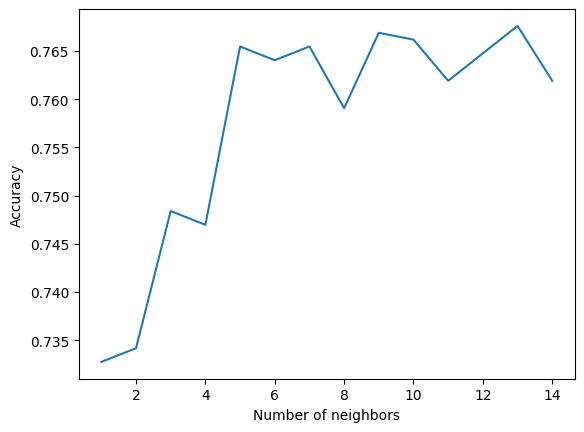

In [ ]:
plt.plot(range(1,15), acc2)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Setting 2
acc2 = []
for i in range(1,15):
  knn2 = KNeighborsClassifier(n_neighbors=i, p=2, metric='manhattan', weights='distance')
  knn2.fit(X_train, y_train)
  y_pred_knn2 = knn2.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc2.append(accuracy_score(y_test, y_pred_knn2))
  print("Accuracy:", accuracy_score(y_test, y_pred_knn2))

# of neigbours: 1
Accuracy: 0.7299218194740583
# of neigbours: 2
Accuracy: 0.7313432835820896
# of neigbours: 3
Accuracy: 0.7533759772565742
# of neigbours: 4
Accuracy: 0.749822316986496
# of neigbours: 5
Accuracy: 0.7654584221748401
# of neigbours: 6
Accuracy: 0.767590618336887
# of neigbours: 7
Accuracy: 0.7611940298507462
# of neigbours: 8
Accuracy: 0.7611940298507462
# of neigbours: 9
Accuracy: 0.7626154939587776
# of neigbours: 10
Accuracy: 0.7654584221748401
# of neigbours: 11
Accuracy: 0.7619047619047619
# of neigbours: 12
Accuracy: 0.7604832977967306
# of neigbours: 13
Accuracy: 0.7640369580668088
# of neigbours: 14
Accuracy: 0.7633262260127932


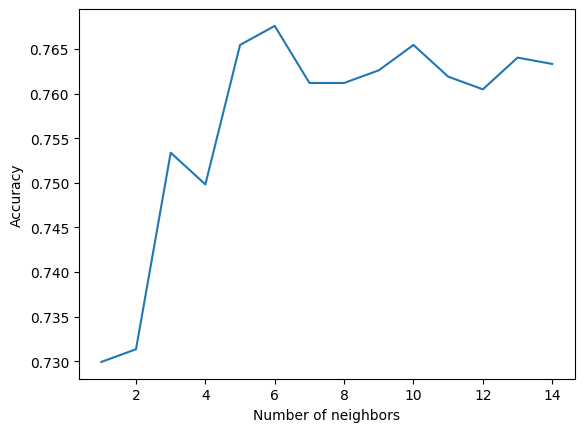

In [ ]:
plt.plot(range(1,15), acc2)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Setting 3
acc3 = []
for i in range(1,15):
  knn3 = KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski', weights= 'uniform')
  knn3.fit(X_train, y_train)
  y_pred_knn3 = knn3.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc3.append(accuracy_score(y_test, y_pred_knn3))
  print("Accuracy:", accuracy_score(y_test, y_pred_knn3))

# of neigbours: 1
Accuracy: 0.7327647476901208
# of neigbours: 2
Accuracy: 0.767590618336887
# of neigbours: 3
Accuracy: 0.7547974413646056
# of neigbours: 4
Accuracy: 0.767590618336887
# of neigbours: 5
Accuracy: 0.7690120824449183
# of neigbours: 6
Accuracy: 0.7704335465529495
# of neigbours: 7
Accuracy: 0.7711442786069652
# of neigbours: 8
Accuracy: 0.7789623312011372
# of neigbours: 9
Accuracy: 0.7782515991471215
# of neigbours: 10
Accuracy: 0.7825159914712153
# of neigbours: 11
Accuracy: 0.7725657427149965
# of neigbours: 12
Accuracy: 0.7775408670931059
# of neigbours: 13
Accuracy: 0.775408670931059
# of neigbours: 14
Accuracy: 0.7789623312011372


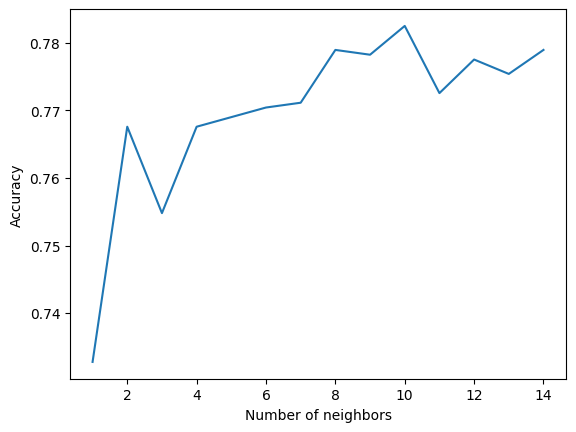

In [ ]:
plt.plot(range(1,15), acc3)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Setting 4
acc4 = []
for i in range(1,15):
  knn4 = KNeighborsClassifier(n_neighbors=10, p=i, metric='minkowski', weights='distance')
  knn4.fit(X_train, y_train)
  y_pred_knn4 = knn4.predict(X_test)
  print("# of neigbours:", i)
  # simply take accuray
  acc4.append(accuracy_score(y_test, y_pred_knn4))
  print("Accuracy:", accuracy_score(y_test, y_pred_knn4))

# of neigbours: 1
Accuracy: 0.7654584221748401
# of neigbours: 2
Accuracy: 0.7661691542288557
# of neigbours: 3
Accuracy: 0.7668798862828714
# of neigbours: 4
Accuracy: 0.7661691542288557
# of neigbours: 5
Accuracy: 0.7668798862828714
# of neigbours: 6
Accuracy: 0.767590618336887
# of neigbours: 7
Accuracy: 0.767590618336887
# of neigbours: 8
Accuracy: 0.7683013503909026
# of neigbours: 9
Accuracy: 0.767590618336887
# of neigbours: 10
Accuracy: 0.7683013503909026
# of neigbours: 11
Accuracy: 0.7690120824449183
# of neigbours: 12
Accuracy: 0.7683013503909026
# of neigbours: 13
Accuracy: 0.7697228144989339
# of neigbours: 14
Accuracy: 0.7683013503909026


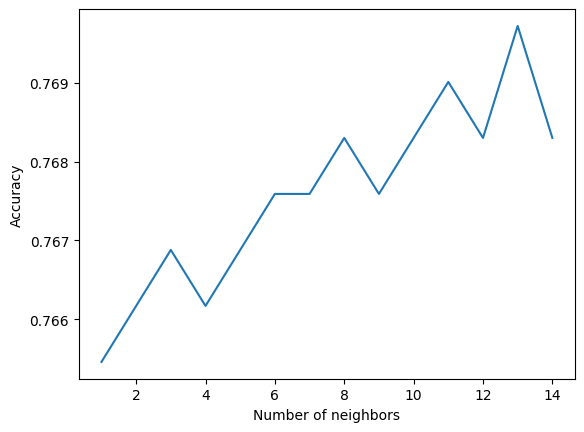

In [ ]:
plt.plot(range(1,15), acc4)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Final Model
knn_fin = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski', weights='uniform')
knn_fin.fit(X_train, y_train)
y_pred_knn_fin = knn_fin.predict(X_test)

quality_metrics(y_test,y_pred_knn_fin)



Accuracy: 0.7761194029850746
Precision: 0.6265060240963856
Recall: 0.4126984126984127
F1 Score: 0.4976076555023922
